In [1]:
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

df = pd.read_csv('Property_with_Feature_Engineering.csv')
df.head()



,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [2]:
#getting rows and columns
df.shape

(191393, 24)

In [3]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

In [4]:
#getting unique names of the cities present in dataset

df['city'].unique()

array(['Lahore', 'Karachi', 'Islamabad', 'Faisalabad', 'Rawalpindi'],
      dtype=object)

In [5]:
#lets predict the housing price of LAhore city

df = df[df['city'] == 'Lahore']
df.head()


,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


# EXPLORATORY DATA  ANALYSIS

In [6]:
# Droping the unnecessary Data (coloums) Like

# dropping unnecessary columns

df = df.drop(["location_id","page_url","province_name","locality","year","month","day","agency","agent","latitude","longitude","property_id","property_type","price_bin","purpose","date_added","city","area"], axis=1)

In [7]:
df = df.reset_index()
df = df.drop("index",axis=1)
df.head()

,price,location,baths,area_marla,area_sqft,bedrooms
0,220000000,Model Town,0,120.0,32670.12,0
1,40000000,Multan Road,5,20.0,5445.02,5
2,9500000,Eden,0,9.0,2450.26,3
3,125000000,Gulberg,7,20.0,5445.02,8
4,21000000,Allama Iqbal Town,5,11.0,2994.76,6


In [8]:
# Checking for Null values in columns

df.isna()  # hence is there is no null value

,price,location,baths,area_marla,area_sqft,bedrooms
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
58731,False,False,False,False,False,False
58732,False,False,False,False,False,False
58733,False,False,False,False,False,False
58734,False,False,False,False,False,False


In [9]:

matplotlib.rcParams["figure.figsize"] = (20,10)

df.shape

(58736, 6)

# DATA CLEANING

In [10]:
# checking for Unique number of bathrooms in house 

df['baths'].unique()

array([ 0,  5,  7,  6,  4,  3,  2,  8,  1, 10,  9, 11, 12, 15],
      dtype=int64)

So, you can see there are 0 
to 15 bath in a house which is prolly a typo

In [11]:
df[df['baths']> 10] 
# there are 7 homes having bathroom greater than 10.

,price,location,baths,area_marla,area_sqft,bedrooms
2488,125000000,Shadman 2,11,40.0,10890.04,11
36484,140000,Wapda Town,11,20.0,5445.02,10
45729,90000000,DHA Defence,12,40.0,10890.04,10
51206,200000,Kacha Lawrence Road,15,48.0,13068.05,0


In [12]:
# checking for Unique number of bedrooms in house

df['bedrooms'].unique()


array([ 0,  5,  3,  8,  6,  4,  2,  7,  1, 10, 11,  9, 14, 12, 13, 18, 15,
       16, 25, 20], dtype=int64)

So you can see there total bedrooms is upto 20 which is prolly a typo
lets check the dataset for bedrooms having more than ten bedrooms

In [13]:
df[df['bedrooms']> 10]

,price,location,baths,area_marla,area_sqft,bedrooms
272,750000,Gulberg,7,60.0,16335.06,11
733,120000000,Sabzazar Scheme,10,40.0,10890.04,11
1099,100000000,Garden Town,0,40.0,10890.04,14
1306,25000000,IEP Engineers Town,10,20.0,5445.02,11
1468,8500000,Ferozepur Road,8,5.0,1361.25,11
...,...,...,...,...,...,...
52619,29000000,Riwaz Garden,0,12.0,3267.01,11
53320,600000,Gulberg,0,40.0,10890.04,12
53342,1000000,Gulberg,0,80.0,21780.08,20
57338,49000000,Bahria Town,7,20.0,5445.02,11


In [14]:
pk = df[(df['bedrooms']==0)]
pk

,price,location,baths,area_marla,area_sqft,bedrooms
0,220000000,Model Town,0,120.0,32670.12,0
14,18500000,Bahria Town,0,10.0,2722.51,0
38,65000000,Valencia Housing Society,0,40.0,10890.04,0
39,1250000000,Gulberg,0,160.0,43560.16,0
41,66500000,Valencia Housing Society,0,40.0,10890.04,0
...,...,...,...,...,...,...
58491,30000,Sabzazar Scheme,0,10.0,2722.51,0
58562,50000,Model Town,0,12.0,3267.01,0
58621,100000,DHA Defence,0,20.0,5445.02,0
58709,130000,DHA Defence,0,10.0,2722.51,0


In [15]:
# removing more than 5 bedrooms wale houses

df = df.drop(df[(df['baths']==0) & (df['bedrooms'] > 3)].index)
df

,price,location,baths,area_marla,area_sqft,bedrooms
0,220000000,Model Town,0,120.0,32670.12,0
1,40000000,Multan Road,5,20.0,5445.02,5
2,9500000,Eden,0,9.0,2450.26,3
3,125000000,Gulberg,7,20.0,5445.02,8
4,21000000,Allama Iqbal Town,5,11.0,2994.76,6
...,...,...,...,...,...,...
58730,32000,Allama Iqbal Town,0,10.0,2722.51,2
58732,185000,DHA Defence,6,20.0,5445.02,5
58733,150000,DHA Defence,5,10.0,2722.51,4
58734,70000,DHA Defence,3,20.0,5445.02,3


In [16]:
# droping columns having 0 baths and 0 bedrooms

df = df.drop(df[(df['bedrooms']==0) | (df['baths']==0)].index)
df

,price,location,baths,area_marla,area_sqft,bedrooms
1,40000000,Multan Road,5,20.0,5445.02,5
3,125000000,Gulberg,7,20.0,5445.02,8
4,21000000,Allama Iqbal Town,5,11.0,2994.76,6
5,52000000,Gulberg,6,20.0,5445.02,5
6,16500000,Military Accounts Housing Society,7,8.0,2178.01,6
...,...,...,...,...,...,...
58719,33000,Bahria Town,3,10.0,2722.51,3
58732,185000,DHA Defence,6,20.0,5445.02,5
58733,150000,DHA Defence,5,10.0,2722.51,4
58734,70000,DHA Defence,3,20.0,5445.02,3


In [17]:
df= df.drop(df[df['bedrooms']==0].index)

In [18]:
#finding is there any home in which number of baths is more than bedrooms since is uncommon

df[df['baths'] > df['bedrooms']] #you could see there are about 20720 houses whose number of baths is more than bedroom we have to handle it 

,price,location,baths,area_marla,area_sqft,bedrooms
5,52000000,Gulberg,6,20.0,5445.02,5
6,16500000,Military Accounts Housing Society,7,8.0,2178.01,6
11,87500000,Upper Mall,5,24.0,6534.02,4
17,50000000,Agrics Town,7,18.0,4900.52,6
19,27500000,Askari,5,12.0,3267.01,4
...,...,...,...,...,...,...
58714,300000,DHA Defence,7,20.0,5445.02,6
58716,43000,Bahria Town,4,5.0,1361.25,3
58732,185000,DHA Defence,6,20.0,5445.02,5
58733,150000,DHA Defence,5,10.0,2722.51,4


# Outliers Detection

In [19]:
# adding new column "price per sqr-ft"

df['price_per_sqft'] = df['price'] / df['area_sqft']
df

,price,location,baths,area_marla,area_sqft,bedrooms,price_per_sqft
1,40000000,Multan Road,5,20.0,5445.02,5,7346.162181
3,125000000,Gulberg,7,20.0,5445.02,8,22956.756816
4,21000000,Allama Iqbal Town,5,11.0,2994.76,6,7012.248060
5,52000000,Gulberg,6,20.0,5445.02,5,9550.010836
6,16500000,Military Accounts Housing Society,7,8.0,2178.01,6,7575.722793
...,...,...,...,...,...,...,...
58719,33000,Bahria Town,3,10.0,2722.51,3,12.121168
58732,185000,DHA Defence,6,20.0,5445.02,5,33.976000
58733,150000,DHA Defence,5,10.0,2722.51,4,55.096216
58734,70000,DHA Defence,3,20.0,5445.02,3,12.855784


In [20]:
l = df['location'].unique()
l

array(['Multan Road', 'Gulberg', 'Allama Iqbal Town',
       'Military Accounts Housing Society', 'Eden', 'Upper Mall',
       'Park View Villas', 'Askari', 'Bedian Road', 'Agrics Town',
       'Chaman Park', 'Chungi Amar Sadhu', 'EME Society', 'GOR',
       'Karim Park', 'Cantt', 'Gulshan-e-Ravi', 'Al-Raheem Garden',
       'Mateen Avenue', 'Paragon City', 'IEP Engineers Town',
       'Bahria Town', 'Architects Engineers Housing Society',
       'DHA Defence', 'Samanabad', 'Mozang', 'Model Town', 'Sultan Pura',
       'T & T Aabpara Housing Society', 'Al Faisal Town', 'Canal Garden',
       'Muslim Nagar Housing Scheme', 'Tricon Village', 'Cavalry Ground',
       'PCSIR Housing Scheme', 'Pak Arab Housing Society', 'Green Fort',
       'State Life Housing Society', 'DHA 11 Rahbar',
       'Shershah Colony - Raiwind Road', 'Jaranwala Road',
       'Cricketer Villas', 'Rehman Villas', 'Faisal Town',
       'Harbanspura Road', 'Alfalah Town',
       'Punjab Govt Employees Society', 'Ashia

In [21]:
len(l) # so there are about 199 unique locations

618

In [22]:
df['location']=df['location'].apply(lambda x: x.strip())

In [23]:
no_of_houses = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
no_of_houses.head(100)

location
DHA Defence           10188
Bahria Town            5846
Johar Town             2503
Askari                 1523
Wapda Town             1176
                      ...  
Shah Jamal               53
Ghous Garden             53
Sukh Chayn Gardens       53
Manawan                  52
Airport Road             52
Name: location, Length: 100, dtype: int64

In [24]:
len(no_of_houses[no_of_houses <= 10 ])

365

In [25]:


Houses_less_than_10=no_of_houses[no_of_houses <= 10]
Houses_less_than_10

location
Shadman 2                10
Ravi Road                10
Ittehad Colony           10
Raj Garh                 10
P & D Housing Society    10
                         ..
Fane Road                 1
Farid Court Road          1
Madar-e-Millat Road       1
Saiden Shah Colony        1
Alia Town                 1
Name: location, Length: 365, dtype: int64

In [26]:
df['location'] = df['location'].apply(lambda A:'others' if A in Houses_less_than_10 else A)

df['location'].nunique()


254

In [27]:
# I am considering common bedroom area which is 500-700 sqt-ft in pakistan. Any bedroom area which is less than 300 sqr-ft will be consder as outlier

df[df['area_sqft'] / df['bedrooms'] < 300]

,price,location,baths,area_marla,area_sqft,bedrooms,price_per_sqft
23,3200000,Chungi Amar Sadhu,2,3.0,816.75,3,3917.967554
35,5500000,others,3,2.5,680.63,3,8080.748718
71,6000000,Allama Iqbal Town,2,2.0,544.50,3,11019.283747
72,5500000,Allama Iqbal Town,2,2.0,544.50,3,10101.010101
119,4500000,Al Faisal Town,3,2.0,544.50,3,8264.462810
...,...,...,...,...,...,...,...
58453,3300000,Mughalpura,2,1.0,272.25,2,12121.212121
58496,25000,DHA Defence,1,1.0,272.25,1,91.827365
58503,22000,DHA Defence,1,1.1,299.48,1,73.460665
58519,8500,Gulberg,1,1.1,299.48,1,28.382530


In [28]:
# so there are about 3601   houses having area less than 300 sqr-ft. get rid of them.

df = df.drop(df[df['area_sqft'] / df['bedrooms'] < 300].index)
df

,price,location,baths,area_marla,area_sqft,bedrooms,price_per_sqft
1,40000000,Multan Road,5,20.0,5445.02,5,7346.162181
3,125000000,Gulberg,7,20.0,5445.02,8,22956.756816
4,21000000,Allama Iqbal Town,5,11.0,2994.76,6,7012.248060
5,52000000,Gulberg,6,20.0,5445.02,5,9550.010836
6,16500000,Military Accounts Housing Society,7,8.0,2178.01,6,7575.722793
...,...,...,...,...,...,...,...
58719,33000,Bahria Town,3,10.0,2722.51,3,12.121168
58732,185000,DHA Defence,6,20.0,5445.02,5,33.976000
58733,150000,DHA Defence,5,10.0,2722.51,4,55.096216
58734,70000,DHA Defence,3,20.0,5445.02,3,12.855784


# Feature Extraction 

In [29]:
df['price_per_sqft'].describe()

count     41638.000000
mean       5979.539002
std        4391.015870
min           0.000735
25%          76.522570
50%        6887.027045
75%        8723.567590
max      106519.742883
Name: price_per_sqft, dtype: float64

In [30]:
# removing price_per_sqft outliers 
def remove_pps_outliers(df):
    result_df = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        standrd_deviation = np.std(subdf['price_per_sqft'])
        m_s=mean-standrd_deviation
        m_plus_std=mean+standrd_deviation
        reduced_df = subdf[(subdf['price_per_sqft'] > (m_s)) & (subdf['price_per_sqft'] <= (m_plus_std))]
        result_df = pd.concat([result_df,reduced_df], ignore_index=True)
    return result_df

In [31]:
df = remove_pps_outliers(df)
df.shape

(27770, 7)

In [32]:


def plotting_bedroom_outlier(df, location):
    
    bedroom_2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bedroom_3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    #matplotlib.rcParams["figure.figsize"] = (15,10)
    
    price_in_lac_b2 = bedroom_2['price']/100000
    price_in_lac_b3 = bedroom_3['price']/100000
    
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='hotpink', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='x', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Square Feet Area")
    plt.ylabel("Price (In Lacs)")
    plt.title(location)
    plt.colorbar()
    plt.legend()

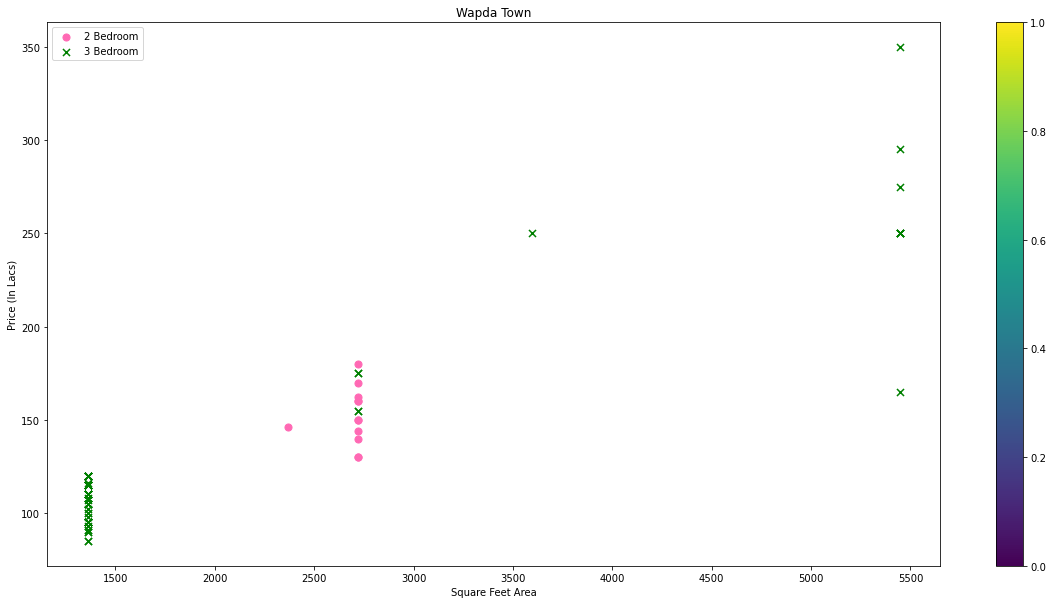

In [33]:
plotting_bedroom_outlier(df, "Wapda Town")


In [34]:
def removing_bedroom_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            bhk_stats[bedroom] = {
                'mean' : np.mean(bedroom_df["price_per_sqft"]),
                'std' : np.std(bedroom_df["price_per_sqft"]),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            stats = bhk_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index") 

In [35]:
df = removing_bedroom_outlier(df)
df.shape

(17633, 7)

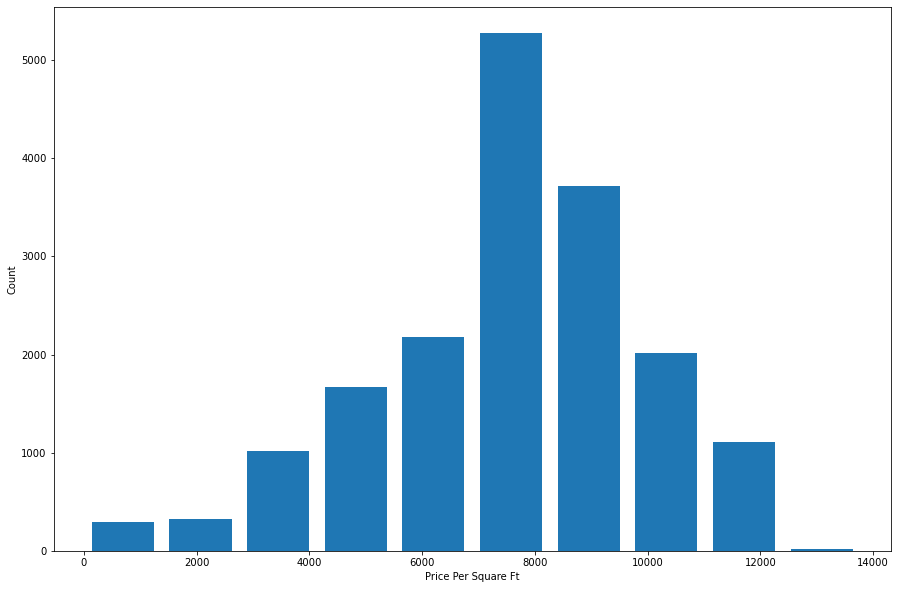

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

In [37]:
df[df['baths'] > df['bedrooms']]

,price,location,baths,area_marla,area_sqft,bedrooms,price_per_sqft
1,19000000,AWT Army Welfare Trust,4,20.0,5445.02,3,3489.427036
3,21000000,AWT Army Welfare Trust,6,20.0,5445.02,5,3856.735145
6,5800000,AWT Army Welfare Trust,3,10.0,2722.51,2,2130.387033
8,9000000,AWT Army Welfare Trust,3,10.0,2722.51,2,3305.772982
14,2800000,Aashiana Road,2,2.0,544.50,1,5142.332415
...,...,...,...,...,...,...,...
27756,20000000,others,7,10.0,2722.51,5,7346.162181
27761,18500000,others,5,10.0,2722.51,4,6795.200018
27762,15000000,others,4,7.0,1905.76,3,7870.875661
27763,40000000,others,6,20.0,5445.02,5,7346.162181


In [38]:
df[df['baths'] > (df['bedrooms'] + 2)]

,price,location,baths,area_marla,area_sqft,bedrooms,price_per_sqft
598,40000,Al-Kabir Town,8,160.0,43560.16,5,0.918270
1972,14000000,Askari,7,10.0,2722.51,3,5142.313527
3009,11800000,Bahria Town,6,5.0,1361.25,3,8668.503214
3323,11200000,Bahria Town,6,5.0,1361.25,3,8227.731864
3381,50000000,Bahria Town,9,20.0,5445.02,5,9182.702727
...,...,...,...,...,...,...,...
26217,65000000,Valencia Housing Society,8,40.0,10890.04,5,5968.756772
26250,75000000,Valencia Housing Society,10,40.0,10890.04,7,6887.027045
27165,19500000,others,5,10.0,2722.51,2,7162.508127
27421,17500000,others,8,10.0,2722.51,5,6427.891909


In [39]:
df = df.drop(df[df['baths'] > (df['bedrooms'] + 2)].index)
df.shape

(17543, 7)

In [40]:
df.head(60)


,price,location,baths,area_marla,area_sqft,bedrooms,price_per_sqft
0,11000000,AWT Army Welfare Trust,4,10.0,2722.51,4,4040.389200
1,19000000,AWT Army Welfare Trust,4,20.0,5445.02,3,3489.427036
2,5000000,AWT Army Welfare Trust,2,5.0,1361.25,3,3673.094582
3,21000000,AWT Army Welfare Trust,6,20.0,5445.02,5,3856.735145
4,5600000,AWT Army Welfare Trust,2,10.0,2722.51,2,2056.925411
5,11000000,AWT Army Welfare Trust,5,10.0,2722.51,5,4040.389200
6,5800000,AWT Army Welfare Trust,3,10.0,2722.51,2,2130.387033
7,11500000,AWT Army Welfare Trust,3,10.0,2722.51,3,4224.043254
8,9000000,AWT Army Welfare Trust,3,10.0,2722.51,2,3305.772982
9,16000000,AWT Army Welfare Trust,3,20.0,5445.02,3,2938.464872


In [41]:
df1 = df.drop("price_per_sqft", axis=1)

In [42]:
dummies = pd.get_dummies(df1['location'])
dummies


,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Aitchison Society,Al Faisal Town,Al Hafeez Gardens,Al Hamad Colony,Al Jalil Garden,...,Wahdat Road,Walled City,Walton Road,Wapda Town,Wassanpura,West Wood Housing Society,Zaheer Villas,Zaitoon - New Lahore City,Zaman Colony,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df1 = pd.concat([df1, dummies.drop('others', axis=1)], axis="columns")
df1 = df1.drop("location", axis=1)
df1.head()
df1.shape

(17543, 256)

In [44]:
df1.head()

,price,baths,area_marla,area_sqft,bedrooms,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,...,Wahdat Colony,Wahdat Road,Walled City,Walton Road,Wapda Town,Wassanpura,West Wood Housing Society,Zaheer Villas,Zaitoon - New Lahore City,Zaman Colony
0,11000000,4,10.0,2722.51,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19000000,4,20.0,5445.02,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5000000,2,5.0,1361.25,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21000000,6,20.0,5445.02,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5600000,2,10.0,2722.51,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MODEL BUILDING AND EVALUATION

In [45]:
X = df1.drop('price', axis=1) # Features
X

,baths,area_marla,area_sqft,bedrooms,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Aitchison Society,...,Wahdat Colony,Wahdat Road,Walled City,Walton Road,Wapda Town,Wassanpura,West Wood Housing Society,Zaheer Villas,Zaitoon - New Lahore City,Zaman Colony
0,4,10.0,2722.51,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,20.0,5445.02,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,5.0,1361.25,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,20.0,5445.02,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,10.0,2722.51,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27760,3,5.0,1361.25,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27761,5,10.0,2722.51,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27762,4,7.0,1905.76,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27763,6,20.0,5445.02,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y = df1['price'] 
y

0        11000000
1        19000000
2         5000000
3        21000000
4         5600000
           ...   
27760    11000000
27761    18500000
27762    15000000
27763    40000000
27764    10500000
Name: price, Length: 17543, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split # for dividing data into training and test sets
from sklearn.linear_model import LinearRegression # for predicting price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5103201045201804

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.2819663 , 0.64865632, 0.70249407, 0.6734129 , 0.42063599])

In [49]:
# importing other regression models to find the best performing model using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [50]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params': {'normalize':[True,False]}
    
        },'decision_tree_regressor':{
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse','friedman_mse'], 'splitter':['best','random']}
        },'lasso': {
            'model':Lasso(),
            'params': {'alpha':[1,2], 'selection':['random','cyclic']}
        }
    }
    
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False, n_jobs=-1, cv=cv)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_ ,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [51]:
find_best_model_using_gridsearchcv(X, y)

C:\Users\Abdul Rehman\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.545433,{'normalize': True}
1,decision_tree_regressor,0.852273,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.545589,"{'alpha': 2, 'selection': 'random'}"


In [52]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=0)
dtr.fit(X.values, y)



DecisionTreeRegressor(criterion='friedman_mse', random_state=0,
                      splitter='random')

In [53]:
X.columns

Index(['baths', 'area_marla', 'area_sqft', 'bedrooms',
       'AWT Army Welfare Trust', 'Aashiana Road',
       'Abdalians Cooperative Housing Society', 'Airline Housing Society',
       'Airport Road', 'Aitchison Society',
       ...
       'Wahdat Colony', 'Wahdat Road', 'Walled City', 'Walton Road',
       'Wapda Town', 'Wassanpura', 'West Wood Housing Society',
       'Zaheer Villas', 'Zaitoon - New Lahore City', 'Zaman Colony'],
      dtype='object', length=255)

In [54]:
def predict_price(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = sqft
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    return dtr.predict([x])[0] / 100000

In [55]:
training_data_prediction = lr.predict(X_train)

In [56]:
# import seaborn as sns
# predictions = lr.predict(X_test)
# sns.distplot((y_test-predictions),bins=50);

In [57]:
print(str(int(predict_price('AWT Army Welfare Trust', 2700, 5, 5))) + " Lakhs")

110 Lakhs


In [61]:
print(str(int(predict_price('Abdalians Cooperative Housing Society', 5500, 5, 6))) + " Lakhs")

540 Lakhs


In [65]:
# exporting model using pickle 

import pickle
with open('lahore_model.pickle','wb') as K_m:
    pickle.dump(dtr, K_m)

In [64]:
import json
columns = {
    'col_name' : [col.lower() for col in X.columns]
}
with open("cols.json","w") as f:
    f.write(json.dumps(columns))